<a href="https://colab.research.google.com/github/WVital2025/Universal-Approximation-Theorem-for-Tessarine-Valued-Neural-Networks/blob/main/ENIAC_2021_Rafael_e_Wington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
# Basic bibs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import tensorflow and some keras functions
import tensorflow as tf
import tensorflow.keras as kr
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
# from tf.keras.optimizers import Adam
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# Datasets
# from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer, StandardScaler

In [ ]:
# Bib for advanced plotting.
from mlxtend.plotting import plot_decision_regions

# Generate dataset

In [ ]:
def tessarine_multiplication(p, q):
  mult = [[p[0]*q[0] -p[1]*q[1] +p[2]*q[2] -p[3]*q[3]],
          [p[0]*q[1] +p[1]*q[0] +p[2]*q[3] +p[3]*q[2]],
          [p[0]*q[2] -p[1]*q[3] +p[2]*q[0] -p[3]*q[1]],
          [p[0]*q[3] +p[1]*q[2] +p[2]*q[1] +p[3]*q[0]]]
  return np.reshape(np.array(mult), (4,))

In [ ]:
#Teste de tessarine_multiplication
p = [1.0, 2.0, 3.0, 4.0]
q = [1.0, 2.0, 3.0, 4.0]

teste = tessarine_multiplication(p, q)
teste

array([-10.,  28., -10.,  20.])

# Define the training dataset

In [ ]:
p = [1.5, -1.3, 1.2, 0.5]
q = [0.5, 0.3, 0.2, -1.0]

In [ ]:
Ntr = 400
x_train = 2*np.random.rand(Ntr, 4) - 1

y_train = np.zeros_like(x_train)

for i in range(x_train.shape[0]):
    y_train[i] =  tessarine_multiplication(x_train[i],p)
    + tessarine_multiplication(q, x_train[i])
    + tessarine_multiplication(x_train[i], x_train[i])

x_train.shape, y_train.shape

((400, 4), (400, 4))

In [ ]:
Nte = 100
x_test = 2*np.random.rand(Nte, 4) - 1

y_test = np.zeros_like(x_test)

for i in range(x_test.shape[0]):
    y_test[i] =  tessarine_multiplication(x_test[i], p)
    + tessarine_multiplication(q, x_test[i])
    + tessarine_multiplication(x_test[i], x_test[i])

x_test.shape, y_test.shape

((100, 4), (100, 4))

# Tessarine-Valued MLP

In [ ]:
class TessarineDense(kr.layers.Layer):
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros'):
        super(TessarineDense, self).__init__()
        self.units = int(units) if not isinstance(units, int) else units
        self.activation = kr.activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = kr.initializers.get(kernel_initializer)
        self.bias_initializer = kr.initializers.get(bias_initializer)


    def build(self, input_shape):
        assert input_shape[-1] % 4 == 0
        input_dim = input_shape[-1] // 4

        # Real-part of the weights
        self.kernel_r = self.add_weight(
            shape=(input_dim, self.units),
            initializer="glorot_normal",
            trainable=True,
        )
        # Imaginary-part of the weights
        self.kernel_i = self.add_weight(
            shape=(input_dim, self.units),
            initializer="glorot_normal",
            trainable=True,
        )
        self.kernel_j = self.add_weight(
            shape=(input_dim, self.units),
            initializer="glorot_normal",
            trainable=True,
        )
        self.kernel_k = self.add_weight(
            shape=(input_dim, self.units),
            initializer="glorot_normal",
            trainable=True,
        )

        # Tessarine-valued bias
        if self.use_bias:
            self.bias = self.add_weight(
                shape=(4*self.units,), initializer="zeros", trainable=True
                )
        else:
            self.bias = None

    def call(self, inputs):
        W_r = tf.concat([self.kernel_r,-self.kernel_i,self.kernel_j,-self.kernel_k],axis=0)
        W_i = tf.concat([self.kernel_i,self.kernel_r,self.kernel_k,self.kernel_j],axis=0)
        W_j = tf.concat([self.kernel_j,-self.kernel_k,self.kernel_r,-self.kernel_i],axis=0)
        W_k = tf.concat([self.kernel_k,self.kernel_j,self.kernel_i,self.kernel_r],axis=0)
        W = tf.concat([W_r,W_i,W_j,W_k],axis=1)
        outputs = tf.matmul(inputs, W)

        if self.use_bias:
            outputs = tf.nn.bias_add(outputs, self.bias)

        if self.activation is not None:
            outputs = self.activation(outputs)

        return outputs

## Experiment

In [ ]:
kr.backend.clear_session()

input = kr.Input(shape=(x_train.shape[1],))
hidden = kr.activations.relu(TessarineDense(2)(input))
output = TessarineDense(1, use_bias = False)(hidden)

tessarine_mlp = Model(inputs=input, outputs=output, name="tessarine_mlp")

tessarine_mlp.summary()

NameError: ignored

In [ ]:
tessarine_mlp.compile(optimizer='Adam',loss='mse')

NameError: ignored

In [ ]:
history_tessarine = tessarine_mlp.fit(x_train, y_train, epochs=1000, verbose=True)

Epoch 1/1000
13/13 [==============================] - 2s 4ms/step - loss: 3.2695
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0598
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.8665
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.6908
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.5404
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3978
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.2725
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1576
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0571
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9634
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.8778
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.8013
Epoch 13/1000
13/13 [====

In [ ]:
plt.semilogy(history_tessarine.history['loss'])

NameError: ignored

In [ ]:
tessarine_prediction = tessarine_mlp.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
Tunits = ['r','i','j','k']

for i,u in enumerate(Tunits):
    plt.figure()
    plt.plot(y_test[:,i], label = 'Analytic')
    plt.plot(tessarine_prediction[:,i], label = 'T-MLP')
    plt.grid()
    plt.legend()
    plt.savefig('T_MLP_'+u+'.png',dpi=300)

    tessarine_error = mean_squared_error(y_test[:,i], tessarine_prediction[:,i])
    print('tessarine_error: %2.1e' % tessarine_error)

NameError: ignored

In [ ]:
Y = np.vstack(tessarine_mlp.layers[1].get_weights()[0:4])
Y[:,0], Y[:,1]

(array([-0.13143204, -1.4320939 ,  0.38440046, -0.04194076], dtype=float32),
 array([-0.69240004,  0.07554562,  0.2367415 ,  2.579554  ], dtype=float32))

In [ ]:
T = np.vstack(tessarine_mlp.layers[1].get_weights()[4:])
# T = T.reshape((4,2))
T[0,0:4]

array([-3.7475054e-08,  9.4559560e-09, -1.9919636e-08,  4.4909502e-08],
      dtype=float32)

In [ ]:
A = np.vstack(tessarine_mlp.layers[3].get_weights())
A = A.reshape((4,2))
A

array([[ 0.95014536,  0.0652809 ],
       [ 1.1504124 , -0.29891205],
       [-0.11758702, -0.52749324],
       [ 0.5384143 , -0.6386757 ]], dtype=float32)

In [ ]:
z_predictions = np.zeros_like(x_test)

for i in range(x_test.shape[1]):
    z0 = kr.activations.relu(tessarine_multiplication(Y[:,0],x_test[i])+T[0,0:4]).numpy()
    z1 = kr.activations.relu(tessarine_multiplication(Y[:,1],x_test[i])+T[0,4:]).numpy()
    z_predictions[i,:] = tessarine_multiplication(A[:,0],z0)+tessarine_multiplication(A[:,1],z1)

In [ ]:
np.linalg.norm(z_predictions - tessarine_prediction)

25.837106823928988

# Real MLP

In [ ]:
kr.backend.clear_session()

input = kr.Input(shape=(x_train.shape[1],))
hidden = kr.activations.relu(kr.layers.Dense(6)(input))
output = kr.layers.Dense(4,use_bias=False)(hidden)

real_mlp = Model(inputs=input, outputs=output, name="real_mlp")

real_mlp.summary()

Model: "real_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 6)                 30        
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [ ]:
real_mlp.compile(optimizer='Adam',loss='mse')

history_real = real_mlp.fit(x_train, y_train, epochs=1000, verbose=True)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1.9527
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.9178
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.8844
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.8518
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.8200
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7869
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7549
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7208
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6868
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6517
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6158
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5790
Epoch 13/1000
13/13 [====

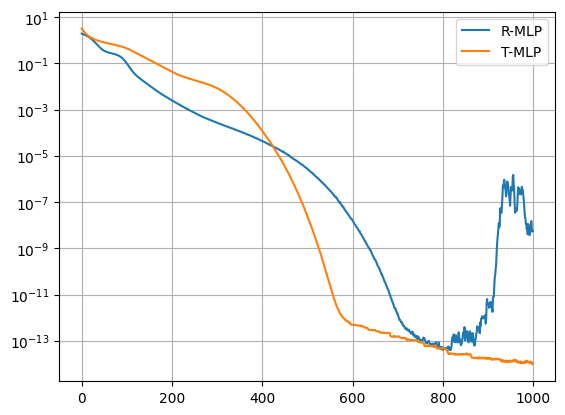

In [ ]:
plt.semilogy(history_real.history['loss'],label="R-MLP")
plt.semilogy(history_tessarine.history['loss'],label="T-MLP")
plt.grid()
plt.legend()

In [ ]:
real_prediction = real_mlp.predict(x_test)

4/4 [==============================] - 0s 3ms/step


real_error: 4.6e-06
real_error: 1.4e-04
real_error: 1.0e-05
real_error: 1.4e-04


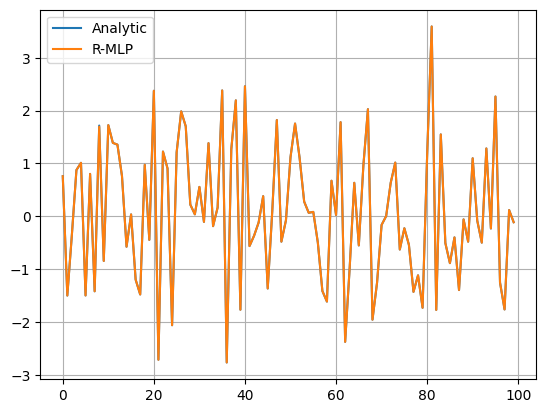

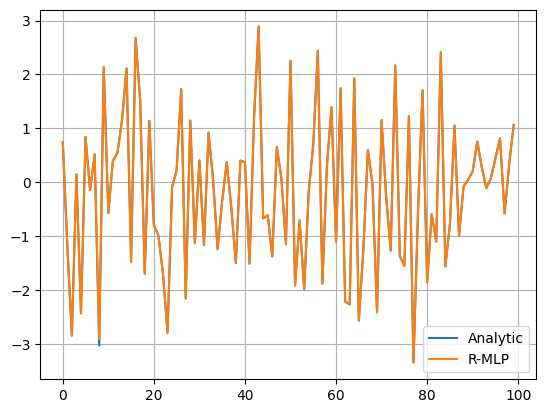

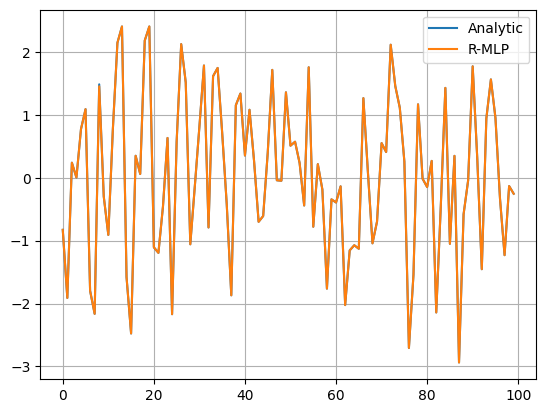

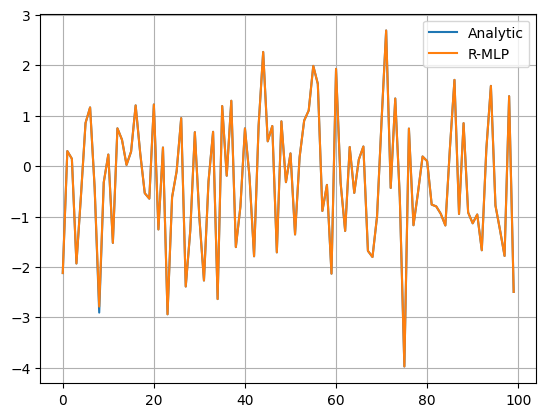

In [ ]:
Tunits = ['r','i','j','k']

for i,u in enumerate(Tunits):
    plt.figure()
    plt.plot(y_test[:,i], label = 'Analytic')
    plt.plot(real_prediction[:,i], label = 'R-MLP')
    plt.grid()
    plt.legend()
    plt.savefig('R_MLP_'+u+'.png',dpi=300)

    real_error = mean_squared_error(y_test[:,i], real_prediction[:,i])
    print('real_error: %2.1e' % real_error)